In [1]:
import numpy as np
import nltk
import pandas as pd

In [2]:
df1=pd.read_csv("Fake.csv")
df2=pd.read_csv("True.csv")


In [3]:
df1.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [4]:
df2.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [5]:
df1=df1.drop('title',axis=1)


In [6]:
df1=df1.drop(["subject","date"],axis=1)
df1

,text
0,Donald Trump just couldn t wish all Americans ...
1,House Intelligence Committee Chairman Devin Nu...
2,"On Friday, it was revealed that former Milwauk..."
3,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis used his annual Christmas Day mes...
...,...
23476,21st Century Wire says As 21WIRE reported earl...
23477,21st Century Wire says It s a familiar theme. ...
23478,Patrick Henningsen 21st Century WireRemember ...
23479,21st Century Wire says Al Jazeera America will...


In [7]:
df1["sentiment"]=False
df2["sentiment"]=True

In [8]:
df2=df2.drop(["title","subject","date"],axis=1)


In [9]:
df=pd.concat([df1,df2])
df

,text,sentiment
0,Donald Trump just couldn t wish all Americans ...,False
1,House Intelligence Committee Chairman Devin Nu...,False
2,"On Friday, it was revealed that former Milwauk...",False
3,"On Christmas day, Donald Trump announced that ...",False
4,Pope Francis used his annual Christmas Day mes...,False
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,True
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",True
21414,MINSK (Reuters) - In the shadow of disused Sov...,True
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,True


In [10]:
df.reset_index(inplace=True) 

In [11]:
import re
import string

DATA CLEANING

In [12]:

def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\n', " ", text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df['news_clean'] = df['text'].apply(clean_text)
df

,index,text,sentiment,news_clean
0,0,Donald Trump just couldn t wish all Americans ...,False,donald trump just couldn t wish all americans ...
1,1,House Intelligence Committee Chairman Devin Nu...,False,house intelligence committee chairman devin nu...
2,2,"On Friday, it was revealed that former Milwauk...",False,on friday it was revealed that former milwauke...
3,3,"On Christmas day, Donald Trump announced that ...",False,on christmas day donald trump announced that h...
4,4,Pope Francis used his annual Christmas Day mes...,False,pope francis used his annual christmas day mes...
...,...,...,...,...
44893,21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,True,brussels reuters nato allies on tuesday welco...
44894,21413,"LONDON (Reuters) - LexisNexis, a provider of l...",True,london reuters lexisnexis a provider of legal...
44895,21414,MINSK (Reuters) - In the shadow of disused Sov...,True,minsk reuters in the shadow of disused soviet...
44896,21415,MOSCOW (Reuters) - Vatican Secretary of State ...,True,moscow reuters vatican secretary of state car...


In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manup\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:


from nltk.corpus import stopwords

stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c','s']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
df['news_clean'] = df['news_clean'].apply(remove_stopwords)
df.head()

,index,text,sentiment,news_clean
0,0,Donald Trump just couldn t wish all Americans ...,False,donald trump wish americans happy new year lea...
1,1,House Intelligence Committee Chairman Devin Nu...,False,house intelligence committee chairman devin nu...
2,2,"On Friday, it was revealed that former Milwauk...",False,friday revealed former milwaukee sheriff david...
3,3,"On Christmas day, Donald Trump announced that ...",False,christmas day donald trump announced would ba...
4,4,Pope Francis used his annual Christmas Day mes...,False,pope francis used annual christmas day message...


In [15]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [16]:
df['news_clean'] = df['news_clean'].apply(stemm_text)
df.head()


,index,text,sentiment,news_clean
0,0,Donald Trump just couldn t wish all Americans ...,False,donald trump wish american happi new year leav...
1,1,House Intelligence Committee Chairman Devin Nu...,False,hous intellig committe chairman devin nune go ...
2,2,"On Friday, it was revealed that former Milwauk...",False,friday reveal former milwauke sheriff david cl...
3,3,"On Christmas day, Donald Trump announced that ...",False,christma day donald trump announc would back ...
4,4,Pope Francis used his annual Christmas Day mes...,False,pope franci use annual christma day messag reb...


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['sentiment'])

df['target_encoded'] = le.transform(df['sentiment'])
df.head()


,index,text,sentiment,news_clean,target_encoded
0,0,Donald Trump just couldn t wish all Americans ...,False,donald trump wish american happi new year leav...,0
1,1,House Intelligence Committee Chairman Devin Nu...,False,hous intellig committe chairman devin nune go ...,0
2,2,"On Friday, it was revealed that former Milwauk...",False,friday reveal former milwauke sheriff david cl...,0
3,3,"On Christmas day, Donald Trump announced that ...",False,christma day donald trump announc would back ...,0
4,4,Pope Francis used his annual Christmas Day mes...,False,pope franci use annual christma day messag reb...,0


In [18]:
df

,index,text,sentiment,news_clean,target_encoded
0,0,Donald Trump just couldn t wish all Americans ...,False,donald trump wish american happi new year leav...,0
1,1,House Intelligence Committee Chairman Devin Nu...,False,hous intellig committe chairman devin nune go ...,0
2,2,"On Friday, it was revealed that former Milwauk...",False,friday reveal former milwauke sheriff david cl...,0
3,3,"On Christmas day, Donald Trump announced that ...",False,christma day donald trump announc would back ...,0
4,4,Pope Francis used his annual Christmas Day mes...,False,pope franci use annual christma day messag reb...,0
...,...,...,...,...,...
44893,21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,True,brussel reuter nato alli tuesday welcom presi...,1
44894,21413,"LONDON (Reuters) - LexisNexis, a provider of l...",True,london reuter lexisnexi provid legal regulato...,1
44895,21414,MINSK (Reuters) - In the shadow of disused Sov...,True,minsk reuter shadow disus sovietera factori m...,1
44896,21415,MOSCOW (Reuters) - Vatican Secretary of State ...,True,moscow reuter vatican secretari state cardin ...,1


In [19]:
df["news_clean"][3]

'christma day donald trump announc would  back work  follow day golf fourth day row former realiti show star blast former presid barack obama play golf trump track outpac number golf game predecessor playedupd tracker trump appear trump  round golf includ today pace pass obama firstterm total juli  next year    philip bump pbump decemb   make washington post report discov trump websit realli weird everyth administr bizarr af code contain refer obama golf  unlik obama work fix problem   golf cours  howev code done correctlyth websit donald trump spent sever day row golf cours code serv follow messag event intern server error    christoph ingraham cingraham decemb   snippet code appear  page footer say paid rnc   christoph ingraham cingraham decemb   also  other note thread weird code clear would ever actual display know  christoph ingraham cingraham decemb   code call refer obama deletedupd golf error messag remov trump gop websit also fix javascript    vs    problem still clear messag 

In [20]:
tot_text = ""

c = 1
for t in df["news_clean"]:
  tot_text += t
  c += 1

print(c)

44899


In [21]:
len(tot_text)

68310398

In [22]:
type(tot_text)

str

HEAPS LAW

In [23]:
import pandas as pd
corpusSize = 0
uniqueTokens = set()
j = 0
dic = {}
for word in tot_text:
    uniqueTokens.add(word)
    corpusSize += 1
    dic[j] = {"Corpus Size": corpusSize, "Unique Tokens": len(uniqueTokens)}
    j = j+1

Vcount_DF =  pd.DataFrame.from_dict(dic, "index")
Vcount_DF

,Corpus Size,Unique Tokens
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
...,...,...
68310393,68310394,66
68310394,68310395,66
68310395,68310396,66
68310396,68310397,66


ZIPF'S LAW

Zipf's law is used to generate the AI powered text that looks like a natural text and contains the words that a normal human use.

Zipf's law was originally formulated in terms of quantitative linguistics, stating that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.

Zipf’s Law states that a small number of words are used all the time, while the vast majority are used very rarely.

**Zipf's law is most easily observed by plotting the data on a log-log graph, with the axes being the logarithm of rank order, and logarithm of frequency.**

In [24]:
import collections

def generate_zipf_table(vocab_dic_sorted, top):

    top_freq = []

    c = 0
    for k in vocab_dic_sorted:
      top_freq.append([k, vocab_dic_sorted[k]])

      if c == top:
        break
      c += 1

    zipf_table = _create_zipf_table(top_freq)

    return zipf_table


def _create_zipf_table(frequencies):

    zipf_table = []

    top_frequency = frequencies[0][1]

    for index, item in enumerate(frequencies, start=1):

        relative_frequency = "1/{}".format(index)
        zipf_frequency = top_frequency * (1/index)
    
        zipf_table.append({"word": item[0],
                           "actual_frequency": item[1],
                           "relative_frequency": relative_frequency,
                           "zipf_frequency": zipf_frequency})

    return zipf_table


def print_zipf_table(zipf_table):

    width = 80

    print("-" * width)
    print("|Rank|    Word    |Actual Freq | Zipf Frac  | Zipf Freq  |")
    print("-" * width)

    format_string = "|{:4}|{:12}|{:12.0f}|{:>12}|{:12.2f}|"

    for index, item in enumerate(zipf_table, start=1):

        print(format_string.format(index,
                                   item["word"],
                                   item["actual_frequency"],
                                   item["relative_frequency"],
                                   item["zipf_frequency"]))

    print("-" * width)

TOKENIZATION

In [25]:
from nltk.tokenize import(word_tokenize)
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manup\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
word_tokenize(tot_text)

['donald',
 'trump',
 'wish',
 'american',
 'happi',
 'new',
 'year',
 'leav',
 'instead',
 'give',
 'shout',
 'enemi',
 'hater',
 'dishonest',
 'fake',
 'news',
 'media',
 'former',
 'realiti',
 'show',
 'star',
 'one',
 'job',
 'countri',
 'rapid',
 'grow',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friend',
 'support',
 'enemi',
 'hater',
 'even',
 'dishonest',
 'fake',
 'news',
 'media',
 'happi',
 'healthi',
 'new',
 'year',
 'presid',
 'angri',
 'pant',
 'tweet',
 'great',
 'year',
 'america',
 'countri',
 'rapid',
 'grow',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friend',
 'support',
 'enemi',
 'hater',
 'even',
 'dishonest',
 'fake',
 'news',
 'media',
 'happi',
 'healthi',
 'new',
 'year',
 'great',
 'year',
 'america',
 'donald',
 'j',
 'trump',
 'realdonaldtrump',
 'decemb',
 'tweet',
 'went',
 'welll',
 'expectwhat',
 'kind',
 'presid',
 'send',
 'new',
 'year',
 'greet',
 'like',
 'despic',
 'petti',
 'infantil',
 'gibberish',
 'trump',
 'lack',
 'decenc',
 'even',
 

In [27]:
#tokens=word_tokenize(tot_text)

In [28]:
from collections import Counter
from nltk.util import ngrams
from nltk.probability import FreqDist

In [29]:
tokens=word_tokenize(tot_text)

FD = FreqDist(t.lower() for t in tokens)
print(len(FD))

185647


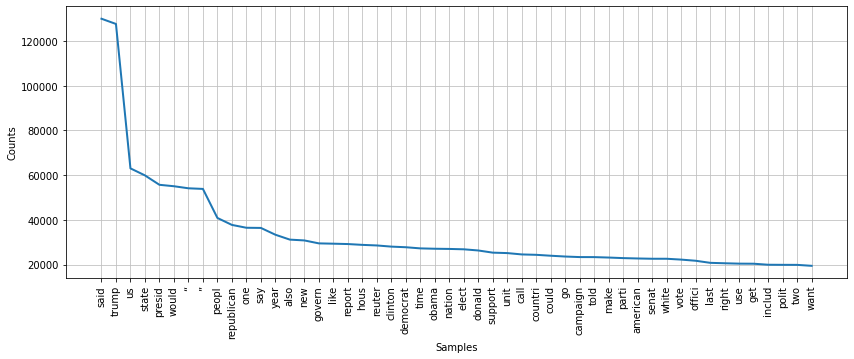

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [14, 5]
FD.plot(50)


unique bigrams incorpus- 3168304
however possible bigrams : 2481534225


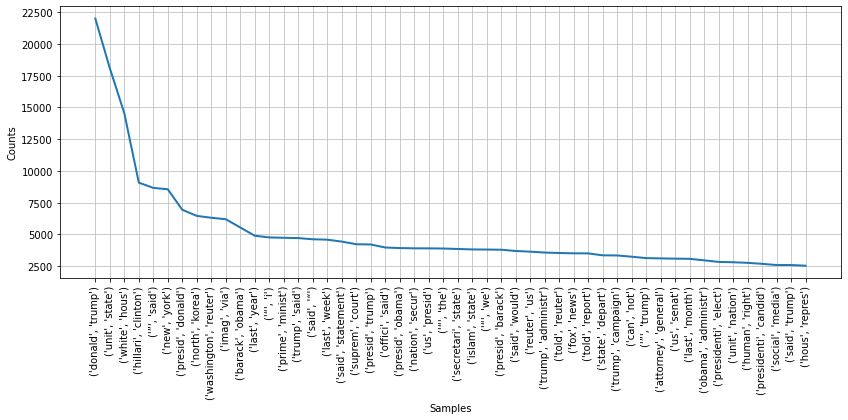

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
#plotting bigrams
tokens=word_tokenize(tot_text)
n = 2 
bigrams = ngrams(tokens, n)      
BigramFD = nltk.FreqDist(token for token in bigrams)
print("unique bigrams incorpus-", len(BigramFD))
print("however possible bigrams :", 49815*49815 )
plt.rcParams['figure.figsize'] = [14, 5]
BigramFD.plot(50)  

unique trigrams incorpus- 6936505


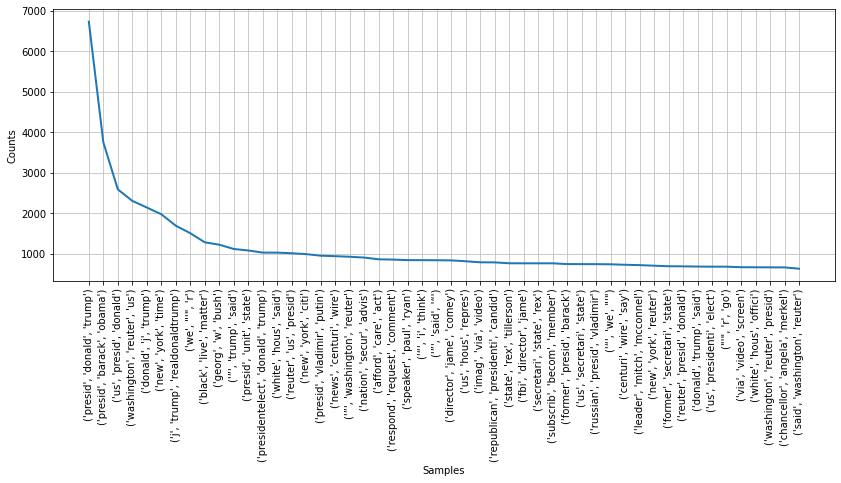

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [32]:
n = 3
trigrams = ngrams(tokens, n)

Trigram = nltk.FreqDist(token for token in trigrams)
print("unique trigrams incorpus-", len(Trigram))
plt.rcParams['figure.figsize'] = [14, 5]
Trigram.plot(50)

unique fourgrams in corpus- 7963795


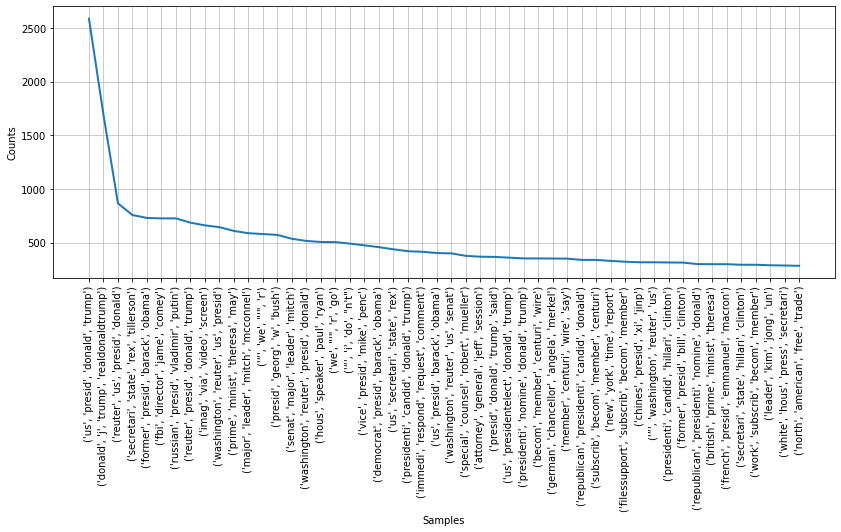

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
n = 4
Quatragrams = ngrams(tokens, n)

Quatragram = nltk.FreqDist(token for token in Quatragrams)
print("unique fourgrams in corpus-", len(Quatragram))
plt.rcParams['figure.figsize'] = [14, 5]
Quatragram.plot(50)

unique fivegrams in corpus- 8284832


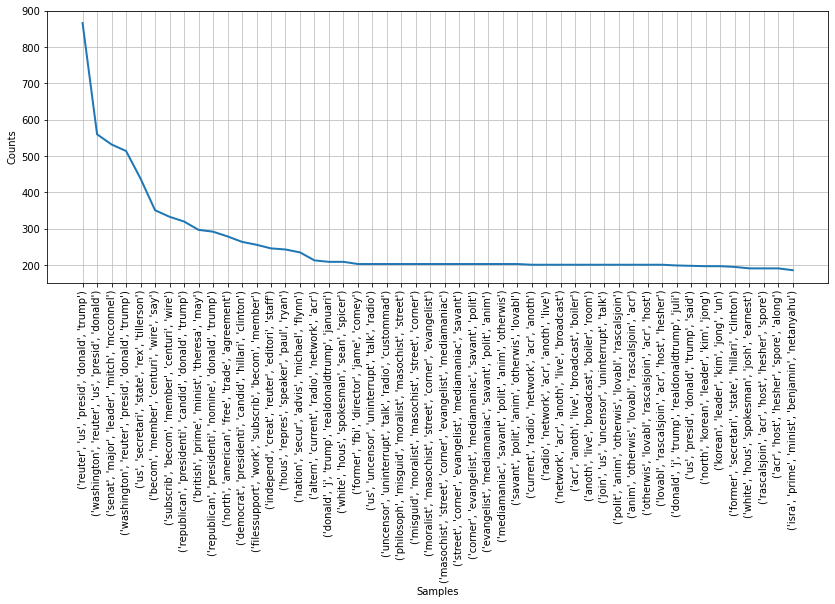

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
n = 5
fivegrams = ngrams(tokens, n)

fivegram = nltk.FreqDist(token for token in fivegrams)
print("unique fivegrams in corpus-", len(fivegram))
plt.rcParams['figure.figsize'] = [14, 5]
fivegram.plot(50)

In [35]:
#LANGUAGE MODELS

In [36]:
def unigramLM(input):
  total_tokens = len(tot_text)
  Prob_input = 1 #0 if log else 1
  
  for token in nltk.word_tokenize(input):
    count_w = FD[token]
    prob = count_w/total_tokens
    #Prob_input += math.log2(prob)
    print("(", token, ")", count_w, prob)
    Prob_input *= count_w/total_tokens
  return Prob_input

input = ["donald ", "the"]

for phrase in input:
  print("probability of ", phrase, "is ", unigramLM(phrase))

( donald ) 26312 0.000385182940963102
probability of  donald  is  0.000385182940963102
( the ) 4012 5.873190784219995e-05
probability of  the is  5.873190784219995e-05


In [37]:
def bigramLM(input):
  prob_input = 1
  token = nltk.word_tokenize(input)
  for i in range(len(token)-1):
    countBigram = BigramFD[(token[i], token[i+1])]
    countBase = FD[token[i]]
    print("(", token[i], token[i+1], ")", countBigram, countBase, countBigram/countBase)
    prob_input *= countBigram/countBase
  
  return prob_input

input = ["told report", "the man"]

for phrase in input:
  print("probability of ", phrase, "is ", bigramLM(phrase))

( told report ) 3512 23343 0.15045195561838667
probability of  told report is  0.15045195561838667
( the man ) 4 4012 0.0009970089730807576
probability of  the man is  0.0009970089730807576


In [38]:
def trigramLM(input):
  prob_input = 1
  token = nltk.word_tokenize(input)
  for i in range(len(token)-2):
    counttrigram = Trigram[(token[i], token[i+1], token[i+2])]
    countBase = BigramFD[(token[i], token[i+1])]
    print("(", token[i], token[i+1], token[i+2], ")", counttrigram,countBase, counttrigram/countBase)
    prob_input *= counttrigram/countBase
  
  return prob_input

input = ["the man has", "i can not"]

for phrase in input:
  print("probability of ", phrase, "is ", trigramLM(phrase))

( the man has ) 0 4 0.0
probability of  the man has is  0.0
( i can not ) 24 25 0.96
probability of  i can not is  0.96


In [39]:
#APPLICATION

In [40]:
from sklearn.model_selection import train_test_split

x = df["text"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 100)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf = Pipeline([("tfidf", TfidfVectorizer()), 
                    ("clf", LinearSVC())
                    ])

text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [42]:
predictions = text_clf.predict(X_test)

In [43]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test,predictions))


[[7670   46]
 [  38 7063]]
              precision    recall  f1-score   support

       False       1.00      0.99      0.99      7716
        True       0.99      0.99      0.99      7101

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



In [44]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.9943308362016603
